# Importing Required Libraries

In [343]:
# Data manipulating and visulization libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# functions for anaylsis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [344]:
data = pd.read_csv("wine.csv")

# Analysis

In [345]:
data.describe()  # Statistical summary of the wine data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [346]:
len(data)  # There are 178 variables in the data

178

<AxesSubplot:>

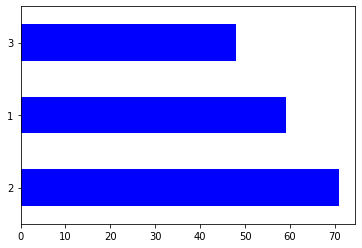

In [347]:
data["Customer_Segment"].value_counts().plot.barh(color="blue")  # The distrubution of the data according to the class variable

c:\users\stc\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


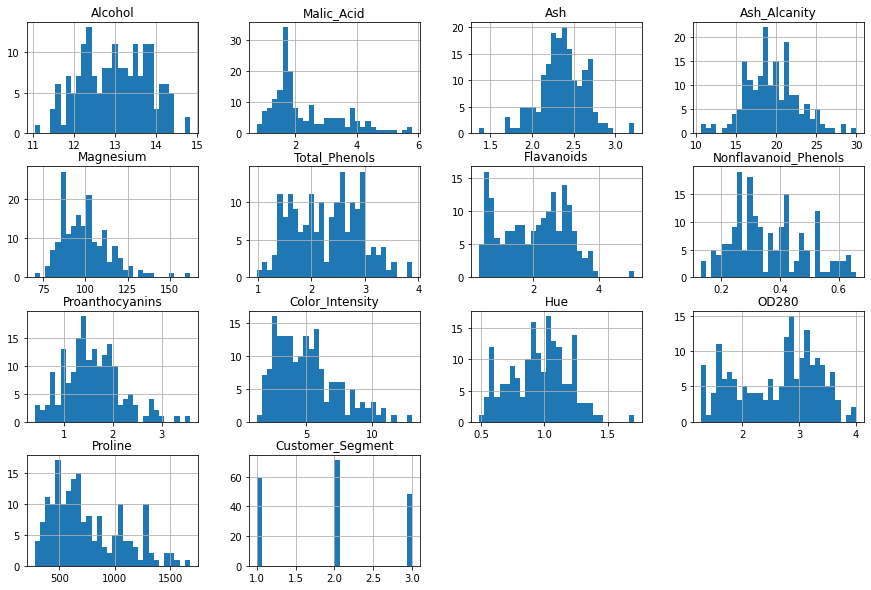

In [348]:
data.hist(bins=30, figsize=(15,10))   # Histogram of the dataset.
plt.show()

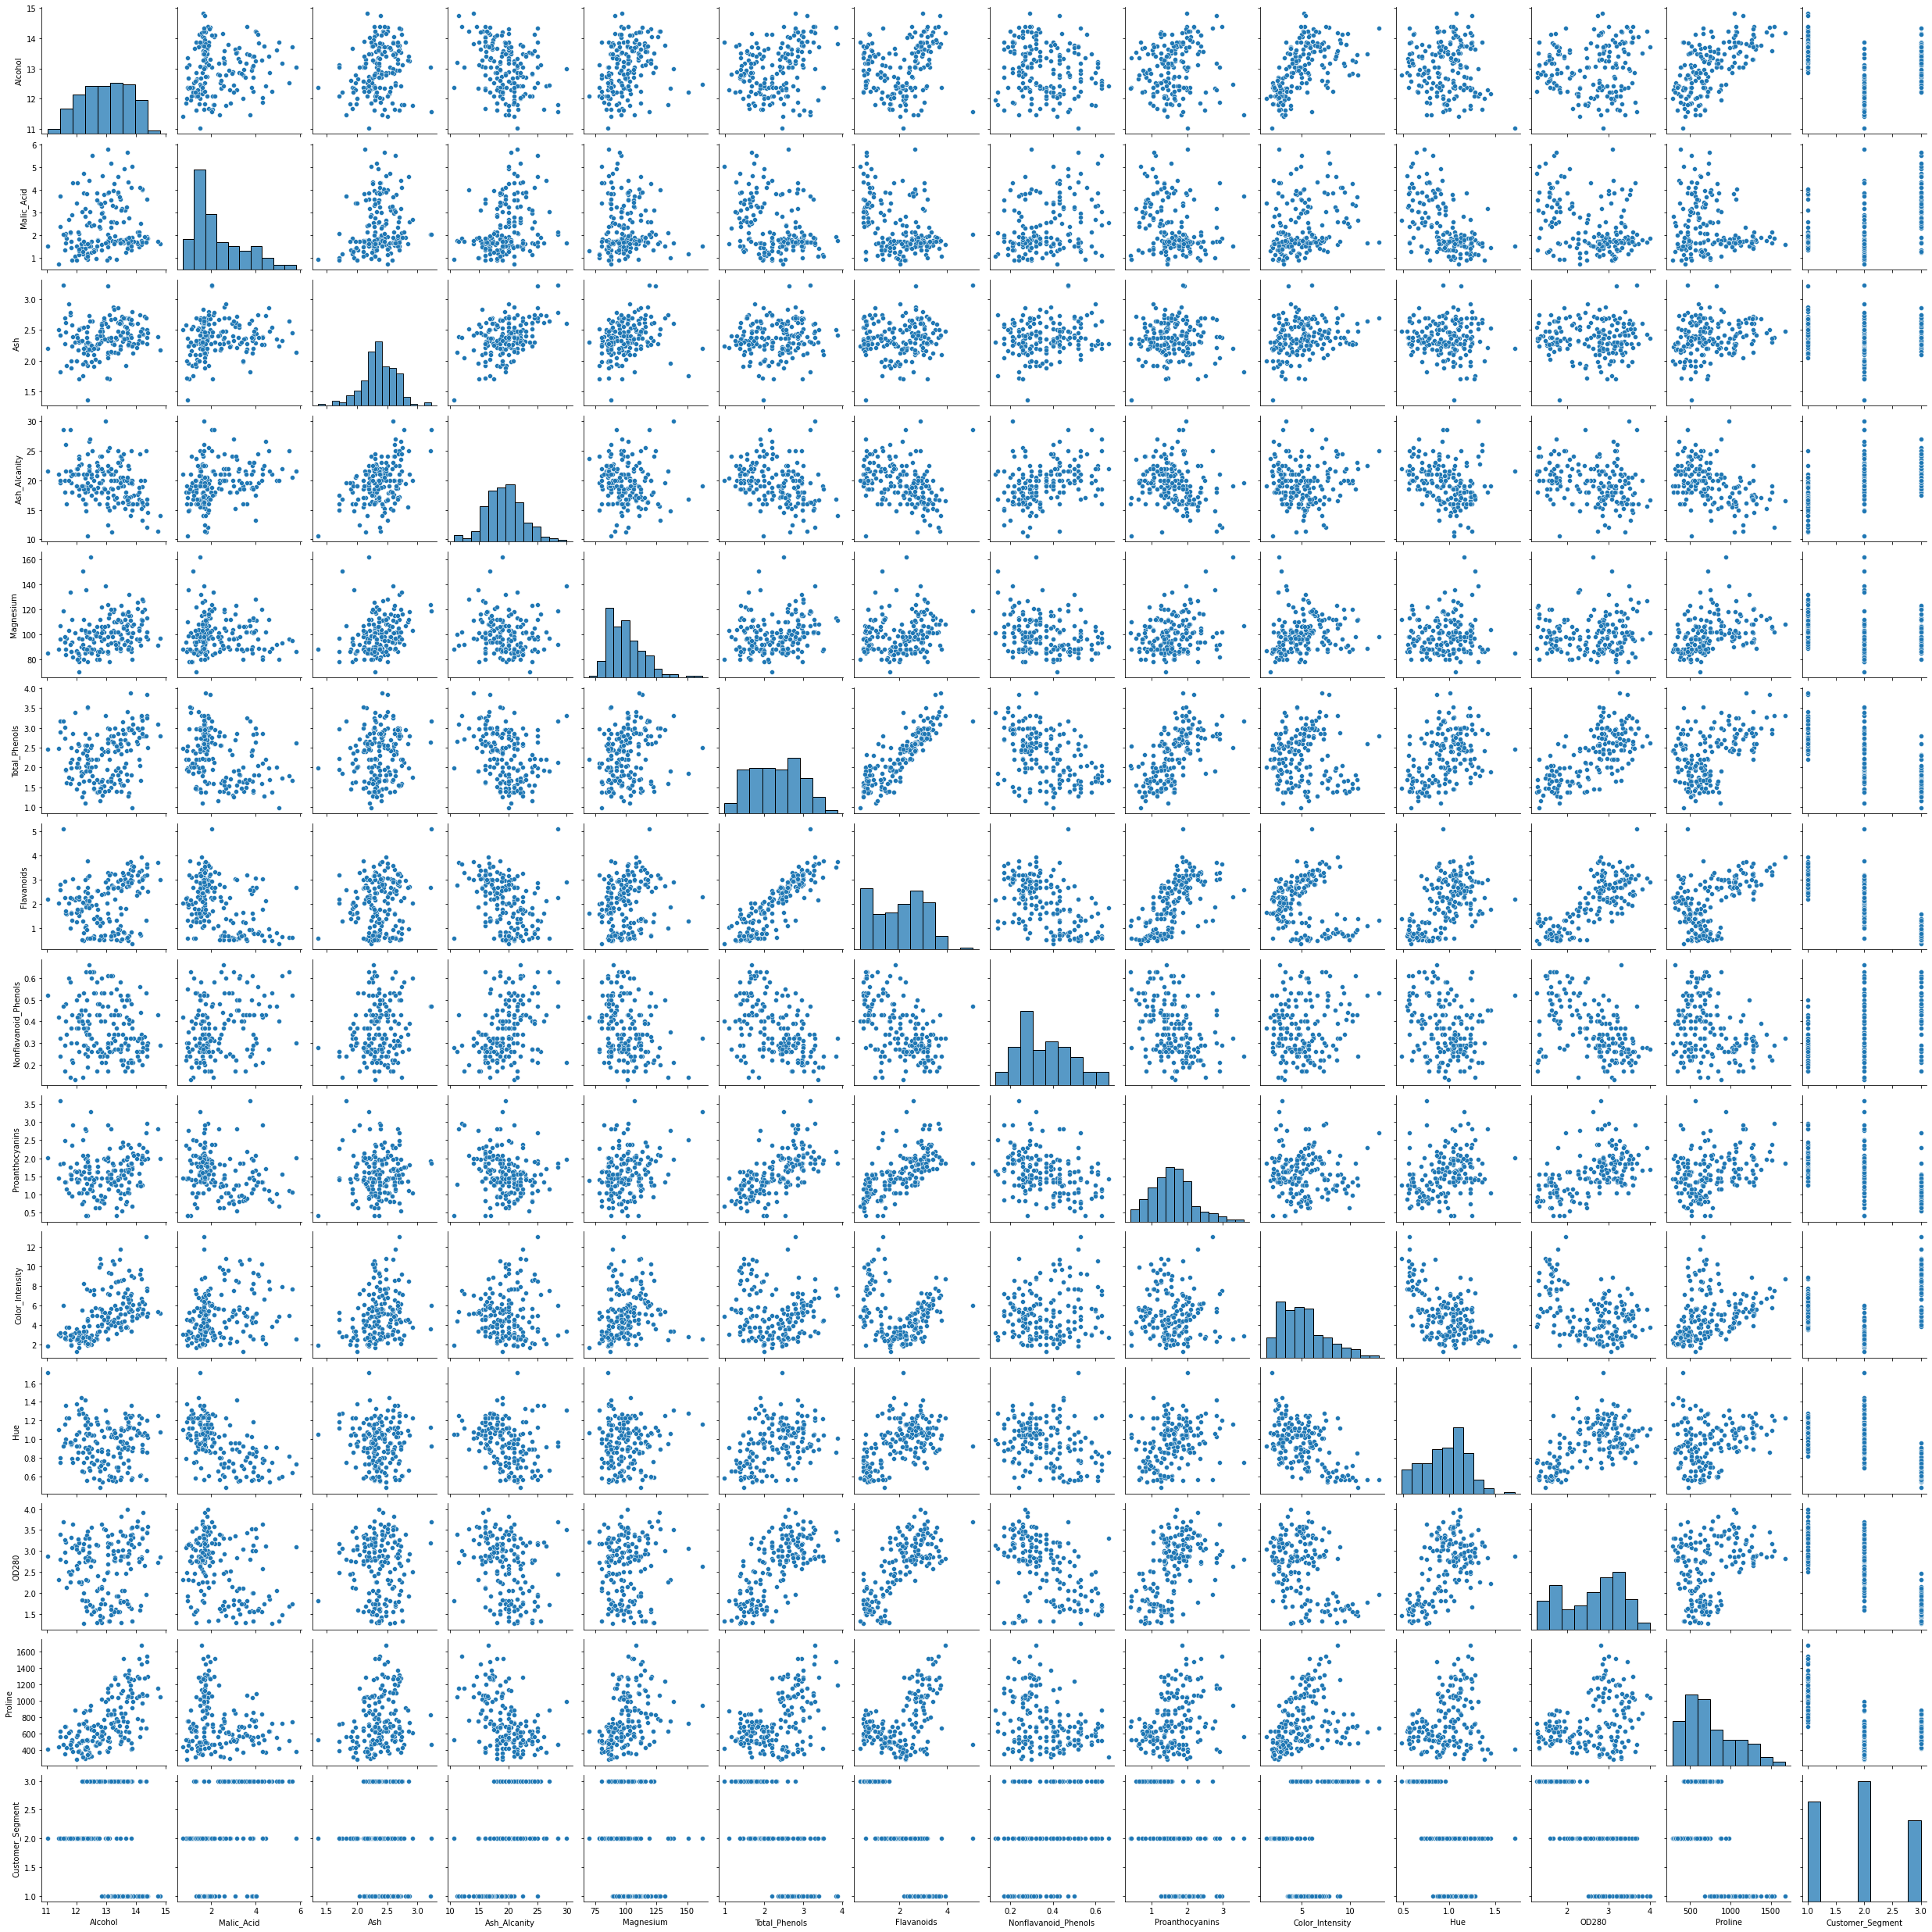

In [349]:
sns.pairplot(data)        # Scatter matrix of the data and relations of each column to other column

<AxesSubplot:>

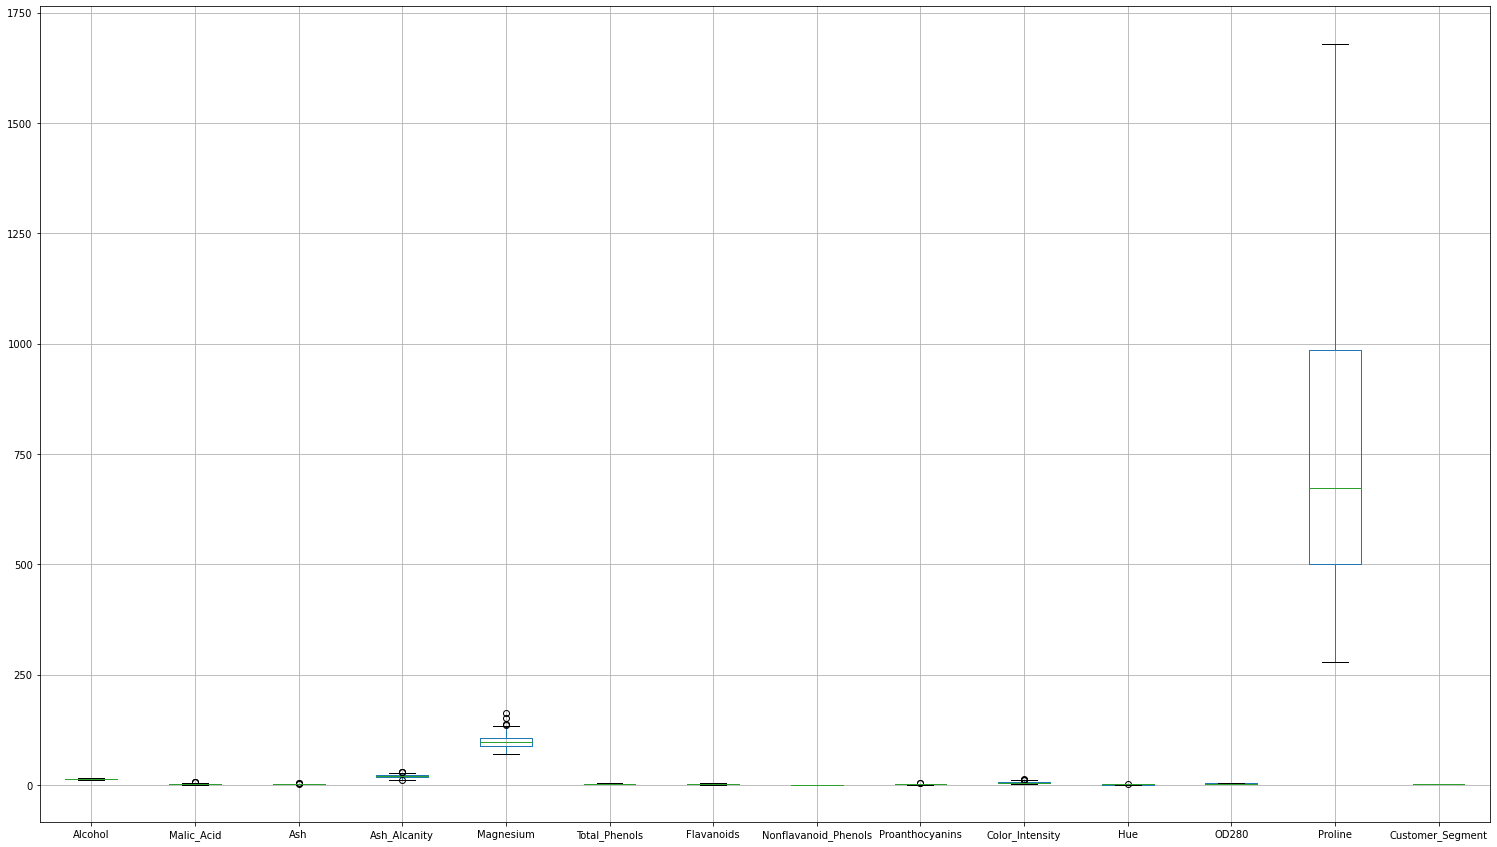

In [350]:
plt.figure(figsize=(26,15))

data.boxplot(column=list(data.columns))  # box graph histogram

# Preprocessing

In [351]:
x = data.drop("Customer_Segment", axis = 1)
y = data["Customer_Segment"]

In [352]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [353]:
scaler = MinMaxScaler()  # We will use MinMaxScaler() to normalize the data. Thus, the model's accuracy and performance will be improved

scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler.fit(x_test)
x_test = scaler.transform(x_test)

# Training

### Confusion Matrix Function to Visualize and Analysis Confusion Matrix

In [354]:
def confMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(
        cm,
        index = [1, 2, 3],  # The values of Customer_Segment are 1, 2, and 3
        columns = [1, 2, 3])
    
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

## Logistic Regression

In [355]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
logReg_pred = logReg.predict(x_test)

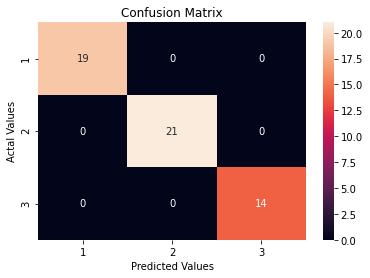

Accuracy:  1.0


In [356]:
confMatrix(y_test, logReg_pred)
print("Accuracy: ", accuracy_score(y_test, logReg_pred))

In [357]:
# The confusion matrix above confirms that the model is perfect.
# All variables are labeled correct.

In [358]:
logReg_cross = LogisticRegression()

In [359]:
cross_val = cross_val_score(logReg_cross, X = x_train, y = y_train, cv = 5) # Our data is already small, so i will divide it to only 5 pieces, cv = 5

In [360]:
cross_val.mean()  # Our model's accuracy is far better than the mean cross validation score.

0.96

## K-Nearest Neighbors

### Finding the best n value for KNN

In [361]:
best_n = 0
best_n_score = 0

In [362]:
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    knn_acc = accuracy_score(y_test, knn_pred)
    if (knn_acc > best_n_score):
        best_n = i
        best_n_score = knn_acc
        
print("Best n is: {} with score: {}".format(best_n, best_n_score))

Best n is: 9 with score: 0.9814814814814815


In [363]:
# We can see that n = 9 is the best hyperparamer for us.

In [364]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

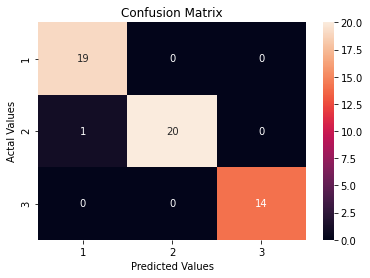

Accuracy:  0.9814814814814815


In [365]:
confMatrix(y_test, knn_pred)
print("Accuracy: ", accuracy_score(y_test, knn_pred))

In [366]:
# The confusion matrix above confirmes that the model is really good, but not good much compared to Logistic Regression model
# We can see that one class 2 variable is labeled as class 1 variable. This is the only weak point

In [367]:
knn_cross = KNeighborsClassifier(n_neighbors = 9)
cross_val = cross_val_score(knn_cross, X = x_train, y = y_train, cv = 5)
cross_val.mean()

0.976

In [368]:
# We can clearly see that our model's accuracy is better than the mean cross validation value

## Random Forest

In [369]:
randomForest = RandomForestClassifier()
randomForest.fit(x_train, y_train)
randomForest_pred = randomForest.predict(x_test)

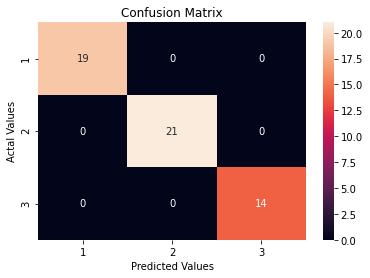

Accuracy:  1.0


In [370]:
confMatrix(y_test, randomForest_pred)
print("Accuracy: ", accuracy_score(y_test, randomForest_pred))

In [371]:
# The confusion matrix above confirms that the model is perfect. Better than KNN model
# All variables are labeled correct.

In [372]:
randomForest_cross = RandomForestClassifier()
cross_val = cross_val_score(randomForest_cross, X = x_train, y = y_train, cv = 5)
cross_val.mean()

0.968

In [373]:
# We can clearly see that our model's accuracy is better than the mean cross validation value

## Support Vector Machine(SVM)

In [374]:
svm_model = SVC(kernel = 'rbf') # We will use Gaussian Radial Basis Function as kernel function since it's really popular and provides good accuracy.
svm_model.fit(x_train, y_train)
svm_model_pred = svm_model.predict(x_test)

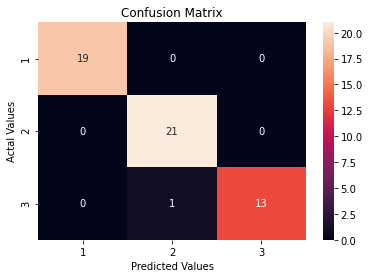

Accuracy:  0.9814814814814815


In [375]:
confMatrix(y_test, svm_pred)
print("Accuracy: ", accuracy_score(y_test, svm_model_pred))

In [376]:
# The confusion matrix above confirmes that the model is really good, but not good much compared to Logistic Regression and Random Forest models
# We can see that one class 3 variable is labeled as class 2 variable. This is the only weak point

In [377]:
svm_model_cross = SVC(kernel='rbf')
cross_val = cross_val_score(svm_model_cross, X = x_train, y = y_train, cv = 5)
cross_val.mean()

0.9756666666666666

In [378]:
# We can clearly see that our model's accuracy is better than the mean cross validation value

## Stochastic Gradient Descent (SGD)

In [379]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)

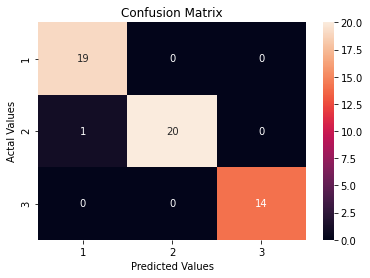

Accuracy:  0.9814814814814815


In [380]:
confMatrix(y_test, sgd_pred)
print("Accuracy: ", accuracy_score(y_test, sgd_pred))

In [381]:
# The confusion matrix above confirmes that the model is really good, but not good much compared to Logistic Regression and Random Forest model
# We can see that one class 2 variable is labeled as class 1 variable. This is the only weak point

In [382]:
sgd_cross = sgd = SGDClassifier()
cross_val = cross_val_score(sgd_cross, X = x_train, y = y_train, cv = 5)
cross_val.mean()

0.968

In [383]:
# We can clearly see that our model's accuracy is better than the mean cross validation value

### Multinomial Naive Bayes

In [384]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

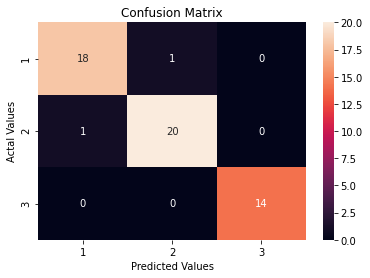

Accuracy:  0.9629629629629629


In [385]:
confMatrix(y_test, nb_pred)
print("Accuracy: ", accuracy_score(y_test, nb_pred))

In [386]:
# The confusion matrix above confirmes that the model is not good compared to other models we created.
# We can see that one class 2 variable is labeled as class 1 variable, also one class 1 variable is labeled as class 2 variable.

In [387]:
nb_cross = sgd = SGDClassifier()
cross_val = cross_val_score(nb_cross, X = x_train, y = y_train, cv = 5)
cross_val.mean()

0.96

In [388]:
# We can clearly see that our model's accuracy is almost same with mean cross validation value

## Conclusion

In [389]:
"""
We tried 6 classification models to wine data;

Logistic Regression, acc: 1.0 = 100%
KNN, acc: 0.981 = 98.1%
Random Forest, acc: 1.0 = 100%
SVM, acc: 0.981 = 98.1%
SGD, acc: 0.981 = 98.1%
MultinomialNB, acc: 0.962 = 96.2%

In the end, we can see that our best models are Logistic Regression and Random Forest models with 1.0 = 100% accuracy.
Unfortunately, MultinomialNB model is worst model for this data, compared to other models.
"""

'\nWe tried 6 classification models to wine data;\n\nLogistic Regression, acc: 1.0 = 100%\nKNN, acc: 0.981 = 98.1%\nRandom Forest, acc: 1.0 = 100%\nSVM, acc: 0.981 = 98.1%\nSGD, acc: 0.981 = 98.1%\nMultinomialNB, acc: 0.962 = 96.2%\n\nIn the end, we can see that our best models are Logistic Regression and Random Forest models with 1.0 = 100% accuracy.\nUnfortunately, MultinomialNB model is worst model for this data, compared to other models.\n'